# Название проекта:
        
#  Сборный проект по анализу бизнес показателей
_____
**Описание исследования.**
    
Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.  

_____
**Цель исследования.**
    
Анализ данных расчета эффективности рекламы и различных каналов привлечения пользователей. 
    
_____
**Задачи исследования.**

- Подготовить данные для исследования, изучить типы и дубликаты;
- Задать функции ждя оасчета и анализа LTV, ROI, удержания и конверсии;
- Проведение исследовательского анализа данных;
- Проанализировать маркетинговые компании компании, затраты и отдачу;
- Оценить окупаемость рекламы;
- Сформировать выводы и рекомендации для отдела маркетинга.

_____
**Исходные данные.**
    
Исходные данные представлены логами с сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.

**Таблица visits_log_short (лог сервера с информацией о посещениях сайта):**

- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region - страна пользователя

**Таблица orders_log_short (информация о заказах):**

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

**Таблица costs_short (информация о затратах на маркетинг):**

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

______
**Данное исследование разделим на несколько частей.**
    
[***Часть 1. Изучение данных из файла:***](#1)
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#11)
* [2. Проверка дубликатов и типов данных.](#12)

[***Часть 2. Создание функций для расчета и анализа LTV, ROI, удержания и конверсии:***](#2)
* [1. Создание профилей.](#21)
* [2. LTV и ROI.](#22)
* [3. Удержание.](#23)
* [4. Конверсия.](#24)
    
[***Часть 3. Исследовательский анализ данных:***](#3)
* [1. Анализ стран.](#31)
* [2. Анализ девайсов.](#32)
* [3. Анализ рекламных каналов.](#33)
    
[***Часть 4. Маркетинг:***](#4)
* [1. Анализ трат.](#41)
* [2. Анализ средней стоимости привлечения на каждый источник.](#42)

[***Часть 5. Оценка окупаемости рекламы для привлечения пользователей.***](#5)   
* [1. Общая окупаемость рекламы.](#51)
* [2. Окупаемость рекламы с разбивкой по устройствам.](#52)
* [3. Окупаемость рекламы с разбивкой по странам.](#54)
* [4. Окупаемость рекламы с разбивкой по рекламным каналам.](#54)
* [5. Конверсия и удержание с разбивкой по устройствам.](#55)
* [6. Конверсия и удержание с разбивкой по странам.](#56)
* [7. Конверсия и удержание с разбивкой по рекламным каналам.](#57)


[***Часть 6. Общий вывод.***](#6)    

<a id='1'></a>
## Изучение и подготовка данных

1.1. Положите данные о визитах, заказах и рекламных тратах в переменные. 

1.2. Подготовьте данные к анализу. Убедитесь, что тип данных во всех колонках соответствует значениям. Проверьте отсутствие дубликатов.

<a id='11'></a>
### Импортируем планируемые к применению в проекте библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

import warnings

warnings.filterwarnings('ignore')

### Открываем файлы

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

<a id='12'></a>
### Проверяем датасеты

#### Посещения

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# приводим название столбцов к нижнему регистру и заменяем пробел на _

visits.columns = [x.replace(' ', '_').lower() for x in visits.columns]

In [6]:
# приводим даты к нужному типу

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# проверяем, все ок

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
round((visits.isna().mean()*100),2)

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [9]:
# проверяем на полные дубликаты

visits.duplicated().sum()

0

In [10]:
# считаем количество уникальных пользователей

visits['user_id'].nunique()

150008

In [11]:
# смотрим уникальные регионы

visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [12]:
visits['region'].value_counts(normalize=True)

United States    0.669010
UK               0.117518
France           0.114217
Germany          0.099254
Name: region, dtype: float64

In [13]:
# смотрим уникальные типы девайсов

visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [14]:
visits['device'].value_counts(normalize=True)

iPhone     0.363352
Android    0.234236
PC         0.202278
Mac        0.200135
Name: device, dtype: float64

In [15]:
# смотрим уникальные типы каналов привлечения

visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [16]:
visits['channel'].value_counts(normalize=True)

organic               0.347724
TipTop                0.176811
FaceBoom              0.158186
WahooNetBanner        0.066037
LeapBob               0.054898
OppleCreativeMedia    0.054191
RocketSuperAds        0.041058
YRabbit               0.029213
MediaTornado          0.028648
AdNonSense            0.022236
lambdaMediaAds        0.020997
Name: channel, dtype: float64

**Вывод**

- пропуски и дубликаты отсутствуют;
- уникальных пользователей 150 тыс, на 309 тыс. уникальных записей сессий;
- 4 региона, доля сессий: США - 67%, Великобритания - 12%, Франция - 11%, Германия - 10%;
- 4 типа девайсов, доля сессий: Айфоны - 36%, Андроид 23%, ПК - 20%, МакОс - 20%;
- 11 типов каналов привлечения. 

#### Покупки

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

In [17]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [19]:
round((orders.isna().mean()*100),2)

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

In [20]:
orders.columns = [x.replace(' ', '_').lower() for x in orders.columns]
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [22]:
orders.duplicated().sum()

0

In [23]:
orders['user_id'].nunique()

8881

In [24]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [25]:
orders['revenue'].value_counts(normalize=True)

4.99     0.960683
5.99     0.019397
9.99     0.009574
49.99    0.005272
19.99    0.005073
Name: revenue, dtype: float64

**Вывод**

- дубликаты и пропуски отсутствуют;
- уникальных покупателей 8 881;
- судя по всему компания предлагает 5 тарифов подписок, от 5 долларов, до 50. Наиболее популярная (96% покупок) самая дешевая за 4.99.

#### Расходы на рекламу

- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

In [26]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [28]:
round((costs.isna().mean()*100),2)

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

In [29]:
costs.columns = [x.replace(' ', '_').lower() for x in costs.columns]
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [30]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [31]:
costs.duplicated().sum()

0

In [32]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [33]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

In [34]:
costs['costs'].sum()

105497.30000000002

In [35]:
costs_p = costs.pivot_table(index='channel',
                 values='costs',
                 aggfunc='sum').reset_index().sort_values(by='costs', ascending=False)
costs_p['costs_s'] = costs_p['costs'] / costs['costs'].sum()
costs_p

,channel,costs,costs_s
6,TipTop,54751.30,0.518983
1,FaceBoom,32445.60,0.307549
7,WahooNetBanner,5151.00,0.048826
0,AdNonSense,3911.25,0.037074
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
2,LeapBob,1797.60,0.017039
9,lambdaMediaAds,1557.60,0.014764
3,MediaTornado,954.48,0.009047
8,YRabbit,944.22,0.008950


**Вывод**

- пропуски и дубликаты отсутствуют;
- уникальных каналов 10 из 11 (отсутствуют рекламные компании в Organic - все сходится);
- всего потрачено на рекламные компании 105 тыс, самая дорогая рекламная компания стоила 630, самая дешевая 0.80.
- всего проведено 1800 рекламных компаний;
- на ибольшие вложения (более 80%) приходится на ТипТоп (52%) и ФейсБум (31%).

<a id='2'></a>
## Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

<a id='21'></a>
### Создание профилей

In [36]:
def get_profiles(sessions, #visits
                 orders, #orders
                 ad_costs): #costs

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [37]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<a id='22'></a>
### LTV и ROI

In [38]:
# функция расчета

def get_ltv(
    profiles, #profiles
    purchases, #orders
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [39]:
# функция визуализации

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='23'></a>
### Удержание 

In [40]:
# функция расчета

def get_retention(
    profiles, #profiles
    sessions, #visits
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [41]:
# функция визуализации

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<a id='24'></a>
### Конверсия 

In [42]:
# функция расчета

def get_conversion(
    profiles, #profiles
    purchases, #orders
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [43]:
# функция визуализации

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='3'></a>
## Исследовательский анализ данных

- 3.1. Создайте пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей.
- 3.2. Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- 3.3. Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- 3.4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [44]:
#строим профили

profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [45]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [46]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

<a id='31'></a>
### Анализ стран

In [47]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [48]:
pd.crosstab(profiles['region'], profiles['payer'], margins=True)

payer,False,True,All
region,,,
France,16787,663,17450
Germany,14365,616,14981
UK,16875,700,17575
United States,93100,6902,100002
All,141127,8881,150008


In [49]:
pd.crosstab(profiles['region'], profiles['payer'], normalize=True, margins=True)

payer,False,True,All
region,,,
France,0.111907,0.004420,0.116327
Germany,0.095762,0.004106,0.099868
UK,0.112494,0.004666,0.117160
United States,0.620634,0.046011,0.666644
All,0.940796,0.059204,1.000000


In [50]:
pd.crosstab(profiles['region'], profiles['payer'], normalize='index')

payer,False,True
region,,
France,0.962006,0.037994
Germany,0.958881,0.041119
UK,0.960171,0.039829
United States,0.930981,0.069019


**Вывод**

- Наибольшее число пользователей из США (66%), далее идут Германия и Франция с 11% и Великобритания с 10%;
- Платит 6% от общего числа пользователей;
- Из 6% 4,6% из США, остальные страны в районе 0.4-0.5%.
- Наилучшая конвертация в платящих опять же у США, почти 7% из пользователей США - платят. Хуже всего пользователи из Франции, менее 4%. 

То есть наибольшая доля платящих из США, затем Великобритания, Франция и Германия. 

<a id='32'></a>
### Анализ девайсов

In [51]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [52]:
pd.crosstab(profiles['device'], profiles['payer'], margins=True)

payer,False,True,All
device,,,
Android,32982,2050,35032
Mac,28130,1912,30042
PC,28918,1537,30455
iPhone,51097,3382,54479
All,141127,8881,150008


In [53]:
pd.crosstab(profiles['device'], profiles['payer'], normalize=True, margins=True)

payer,False,True,All
device,,,
Android,0.219868,0.013666,0.233534
Mac,0.187523,0.012746,0.200269
PC,0.192776,0.010246,0.203023
iPhone,0.340628,0.022545,0.363174
All,0.940796,0.059204,1.000000


In [54]:
pd.crosstab(profiles['device'], profiles['payer'], normalize='index')

payer,False,True
device,,
Android,0.941482,0.058518
Mac,0.936356,0.063644
PC,0.949532,0.050468
iPhone,0.937921,0.062079


**Вывод**

- Наибольшая доля (более 36%) - Айфоны, затем Андроид 23%, Мак и ПК примерно поровну по 20%;
- Наиболее платежеспособные - пользователи Айфонов. Из 6% платящих на Айфон приходится 2,3%, наименее - пользователи ПК. 
- При этом, наибольшая конвертация в платящих у пользоватей Маков, далее идут Айфоны. ПК и тут - самые последние. 

<a id='33'></a>
### Анализ рекламных каналов

In [55]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [56]:
# распределение пользователей по каналам привлечения в разрезе платящих и неплатящих

pivot = pd.crosstab(profiles['channel'], profiles['payer'], margins=True).reset_index()
pivot.columns = ['канал', 'неплатящий', 'платящий', 'все']
pivot

,канал,неплатящий,платящий,все
0,AdNonSense,3440,440,3880
1,FaceBoom,25587,3557,29144
2,LeapBob,8291,262,8553
3,MediaTornado,4208,156,4364
4,OppleCreativeMedia,8372,233,8605
5,RocketSuperAds,4096,352,4448
6,TipTop,17683,1878,19561
7,WahooNetBanner,8100,453,8553
8,YRabbit,4147,165,4312
9,lambdaMediaAds,1924,225,2149


In [57]:
# доля пользователей от общего числа, в разрезе платящих и неплатящих

pivot = pd.crosstab(profiles['channel'], profiles['payer'], normalize=True, margins=True).reset_index()
pivot.columns = ['канал', 'неплатящий', 'платящий', 'все']
pivot

,канал,неплатящий,платящий,все
0,AdNonSense,0.022932,0.002933,0.025865
1,FaceBoom,0.170571,0.023712,0.194283
2,LeapBob,0.055270,0.001747,0.057017
3,MediaTornado,0.028052,0.001040,0.029092
4,OppleCreativeMedia,0.055810,0.001553,0.057364
5,RocketSuperAds,0.027305,0.002347,0.029652
6,TipTop,0.117880,0.012519,0.130400
7,WahooNetBanner,0.053997,0.003020,0.057017
8,YRabbit,0.027645,0.001100,0.028745
9,lambdaMediaAds,0.012826,0.001500,0.014326


In [58]:
# распределение пользователей по платящим и неплатящим в разрезе каждого канала привлечения

pivot = pd.crosstab(profiles['channel'], profiles['payer'], normalize='index').reset_index()
pivot.columns = ['канал', 'неплатящий', 'платящий']
pivot

,канал,неплатящий,платящий
0,AdNonSense,0.886598,0.113402
1,FaceBoom,0.877951,0.122049
2,LeapBob,0.969367,0.030633
3,MediaTornado,0.964253,0.035747
4,OppleCreativeMedia,0.972923,0.027077
5,RocketSuperAds,0.920863,0.079137
6,TipTop,0.903993,0.096007
7,WahooNetBanner,0.947036,0.052964
8,YRabbit,0.961735,0.038265
9,lambdaMediaAds,0.895300,0.104700


**Вывод**

- Наибольшее число клиентов - органического прихода (более 37%), затем идут из Фейсбума - 19% и ТипТопа 13%;
- Наибольший вклад в привод платежеспособных клиентов имеют ФейсБум (2.4% из 6%) и ТипТоп - 1,25%. Органические пользователи около 0.8% из 6% платящих, входят в топ-3 по каналам;
- Наилучшая конвертация у пользователей ФейсБума (12%), наихудшая у органических. 

**Общий вывод**

Наиболее интересные клиенты, если судить по их конвертации в платящих, это пользователи из США с Айфоном или Макбуком и проишедшии из ФейсБума

<a id='4'></a>
## Маркетинг

- 4.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.
- 4.2. Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.

<a id='41'></a>
### Анализ трат

#### Всего трат

In [59]:
costs['costs'].sum()

105497.30000000002

In [60]:
# доля затрат на рекламу в выручке

costs['costs'].sum() / orders['revenue'].sum()

0.48849737510446245

#### На каждый источник

In [61]:
# воспользуемся созданной в 1 шаге таблицей

costs_p

,channel,costs,costs_s
6,TipTop,54751.30,0.518983
1,FaceBoom,32445.60,0.307549
7,WahooNetBanner,5151.00,0.048826
0,AdNonSense,3911.25,0.037074
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
2,LeapBob,1797.60,0.017039
9,lambdaMediaAds,1557.60,0.014764
3,MediaTornado,954.48,0.009047
8,YRabbit,944.22,0.008950


#### По времени

In [62]:
costs_g = costs

In [63]:
costs_g['dt'] = pd.to_datetime(costs['dt'])
costs_g['month'] = costs['dt'].dt.month
costs_g['week'] = costs['dt'].dt.isocalendar().week

In [64]:
costs_g

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


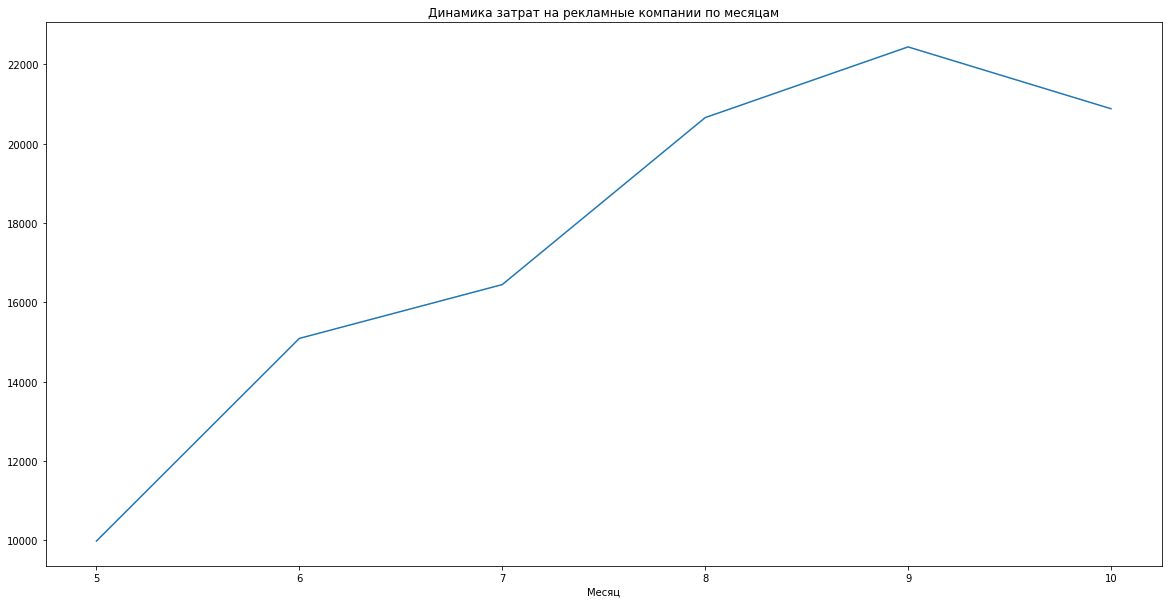

In [65]:
plt.figure(figsize=(20, 10))
costs_g.groupby('month')['costs'].sum().plot()

plt.xlabel('Месяц')
plt.title('Динамика затрат на рекламные компании по месяцам')
plt.show() 

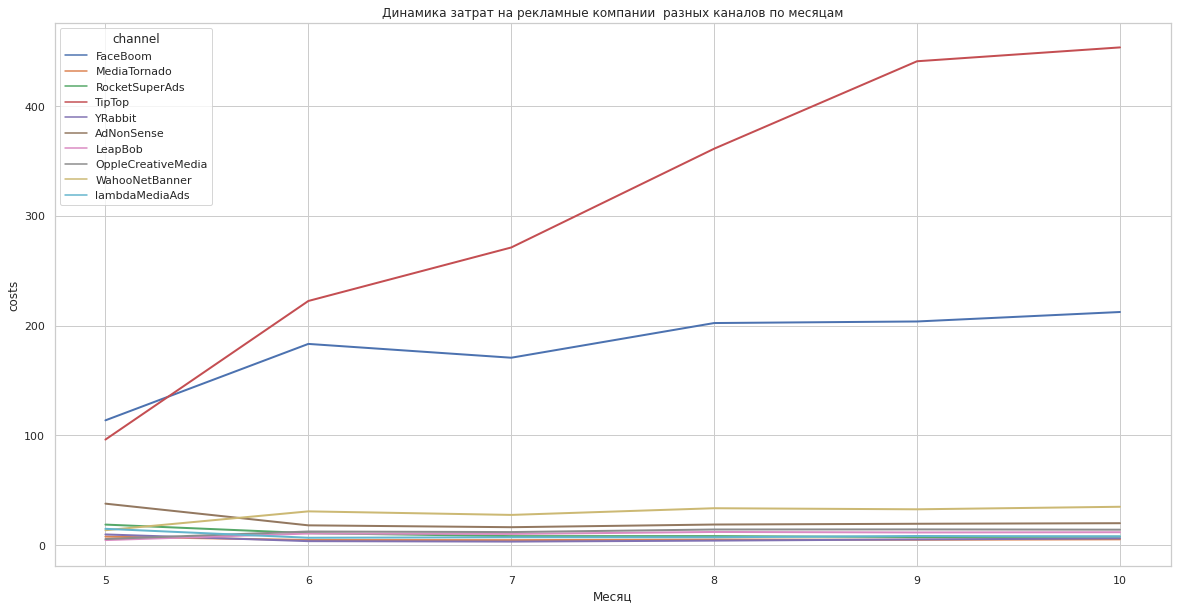

In [66]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(20, 10))
sns.lineplot(x="month", y="costs", hue="channel", data=costs_g, linewidth=2, ci= None)
plt.xlabel('Месяц')
plt.title('Динамика затрат на рекламные компании  разных каналов по месяцам')
plt.show() 

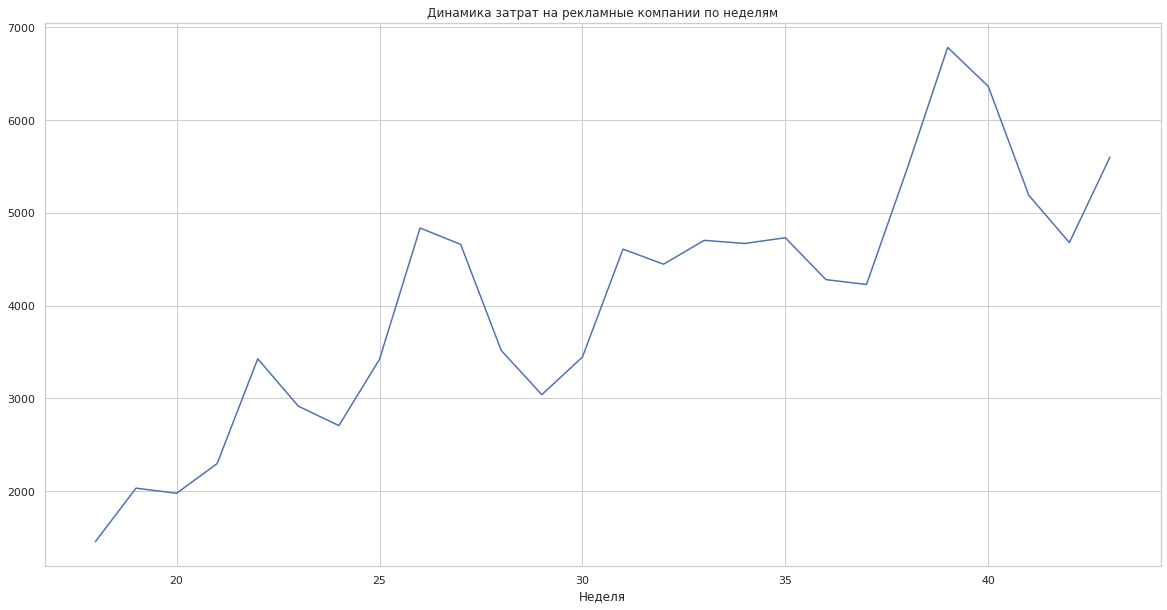

In [67]:
plt.figure(figsize=(20, 10))
costs_g.groupby('week')['costs'].sum().plot()

plt.xlabel('Неделя')
plt.title('Динамика затрат на рекламные компании по неделям')
plt.show() 

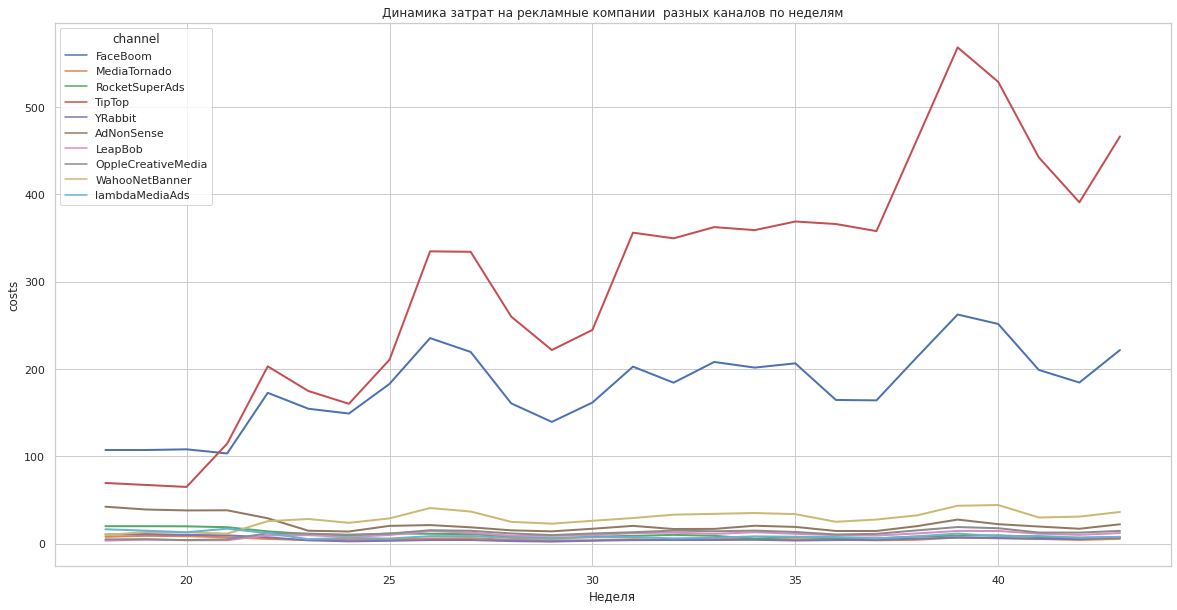

In [68]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="week", y="costs", hue="channel", data=costs_g, linewidth=2, ci= None)
plt.xlabel('Неделя')
plt.title('Динамика затрат на рекламные компании  разных каналов по неделям')
plt.show() 

**Вывод**

- На рекламные компании 105 497 уе, что составляет 49% от выручки анализируемого периода. 
Понятно, что с учетом отложенного эффекта прихода клиентов по маркетинговых компаниям это не означает, что на 1 доллар выручки приходится 49 центов рекламных издержек, однако уже можно заметить, что маржинальность деятельности значительно снижается за счет высоких маркетинговых издержек. 

- Более 80% трат приходится на 2 источника рекламы. Следует обратить внимание в первую очередь на них. Если ФейсБум является самым эффективным источником по метрике конвертации пользователей (раздел 3.3 - конвертация 12%, то ТипТоп занимает 4 место после Лямбды и Аднона с 9,6% конвертацией, но при этом значительно превосходя их по рекламному бюджету (50% бюджета против 3,7% и 1,5%). Следует сравнить РОИ этих истоников в следующих разделах.

- Наибольшие затраты пришлись на рекламные компании в 8-10 месяцах, динамика стабильно растущая, при этом падение в последнем месяце может быть объяснено неполнотой данных (дата формирования выгрузки 27 октября - возможно оплата части рекламных компаний идет в конце месяца). 
- На недельном тренде заметна небольшая "сезонность" с циклом 4-5 месяцев, скорее всего вызвано порядком расчета с каналами привлечения клиентов.

<a id='42'></a>
### Анализ средней стоимости привлечения на каждый источник

In [69]:
# рассчитаем среднюю стоимость привлечения всех пользователей (в разрезе каналов) и платящих пользователей

a = pd.crosstab(profiles['channel'], profiles['payer'], margins=True).reset_index()
costs_p = costs_p.merge(a, on='channel', how='left')
costs_p = costs_p[['channel', 'costs', True, 'All']]
costs_p['cost_of_payers'] = costs_p['costs'] / costs_p[True]
costs_p['cost_of_all'] = costs_p['costs'] / costs_p['All']
costs_p.sort_values(by='cost_of_all', ascending=False)

,channel,costs,True,All,cost_of_payers,cost_of_all
0,TipTop,54751.30,1878,19561,29.154047,2.799003
1,FaceBoom,32445.60,3557,29144,9.121619,1.113286
3,AdNonSense,3911.25,440,3880,8.889205,1.008054
7,lambdaMediaAds,1557.60,225,2149,6.922667,0.724802
2,WahooNetBanner,5151.00,453,8553,11.370861,0.602245
5,RocketSuperAds,1833.00,352,4448,5.207386,0.412095
4,OppleCreativeMedia,2151.25,233,8605,9.232833,0.250000
9,YRabbit,944.22,165,4312,5.722545,0.218975
8,MediaTornado,954.48,156,4364,6.118462,0.218717
6,LeapBob,1797.60,262,8553,6.861069,0.210172


Теперь рассчитаем стоимость привлечения по формуле CAC с использованием таблицы profiles

In [70]:
# убираем органических пользователей для дальнейшего исследования

profiles = profiles.query('channel != "organic"')

In [71]:
# Средний CAC на одного пользователя для всего проекта

profiles['acquisition_cost'].mean()

1.1274813239427588

In [72]:
# Средний CAC на одного пользователя для каждого источника трафика (проверим, что значение совпадет с расчетами парой строк выше)

profiles.groupby('channel')['acquisition_cost'].mean()

channel
AdNonSense            1.008054
FaceBoom              1.113286
LeapBob               0.210172
MediaTornado          0.218717
OppleCreativeMedia    0.250000
RocketSuperAds        0.412095
TipTop                2.799003
WahooNetBanner        0.602245
YRabbit               0.218975
lambdaMediaAds        0.724802
Name: acquisition_cost, dtype: float64

**Вывод**

- С огромным отрывом ТипТоп улетает вперед в вопросе бесполезных трат маркетинговых денег. Привлечение как всех, так и только платящих пользователей значительно опережают ближайших конкурентов. При этом стоит отметить, что имеются каналы с низкой стоимость привлечения клиентов, однако люди с этих каналов не очень охотно конвертируются в покупателей, что выражается в высокой стоимости привлечение покупателей (например WahooNetBanner, топ-2 по этому показателю). 

Таким образом у нас определился Анти-лидер по всем показателям - ТипТоп. Докажем это в следующем разделе с помощью динамики LTV и ROI.

<a id='5'></a>
## Оценка окупаемости рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- 5.1. Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- 5.2. Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- 5.3. Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Опишите обнаруженные проблемы и напишите промежуточные выводы.

- 5.4. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Ответьте на такие вопросы:
•	Окупается ли реклама в целом?
•	Какие устройства, страны и каналы могут снижать окупаемость рекламы?
•	Чем могут быть вызваны проблемы окупаемости?
Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [73]:
# Учитывая вводные про 1 ноября 2019 и 2 недели окупаемости зададим параметры анализа

observation_date = datetime(2019, 10, 18).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

<a id='51'></a>
### Общая окупаемость рекламы

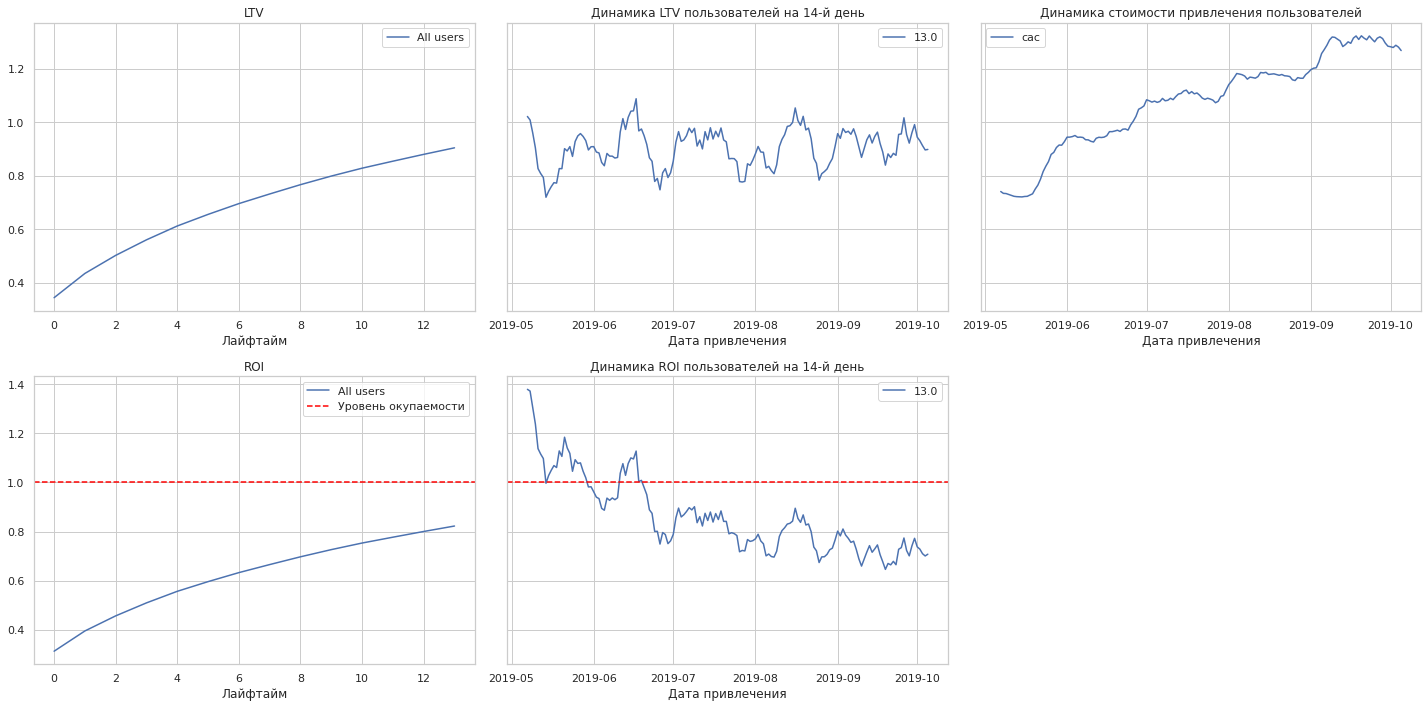

In [74]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы**

- LTV достаточно стабильный, при этом имеются сезонные факторы и незначительное ухудшение качества пользователей;
- Реклама не окупается, к концу второй недели ROI чуть выше 80%;
- Клиенты перестали окупаться после июня месяца. При этом, с учетом взрывного роста вложений в маркетинг в конце мая, был краткосрочный рост динамики ROI в первой половине июня. Затем стабильный спад и пересечение точки окупаемости во второй половине июня. 
- имеет место стабильное увеличение стоимости привлечения пользователей, рекламный бюджет увеличивается.

Изучим графики далее, чтобы понять, какие именно пользователи ухудшают картину. 

<a id='52'></a>
### Окупаемость рекламы с разбивкой по устройствам

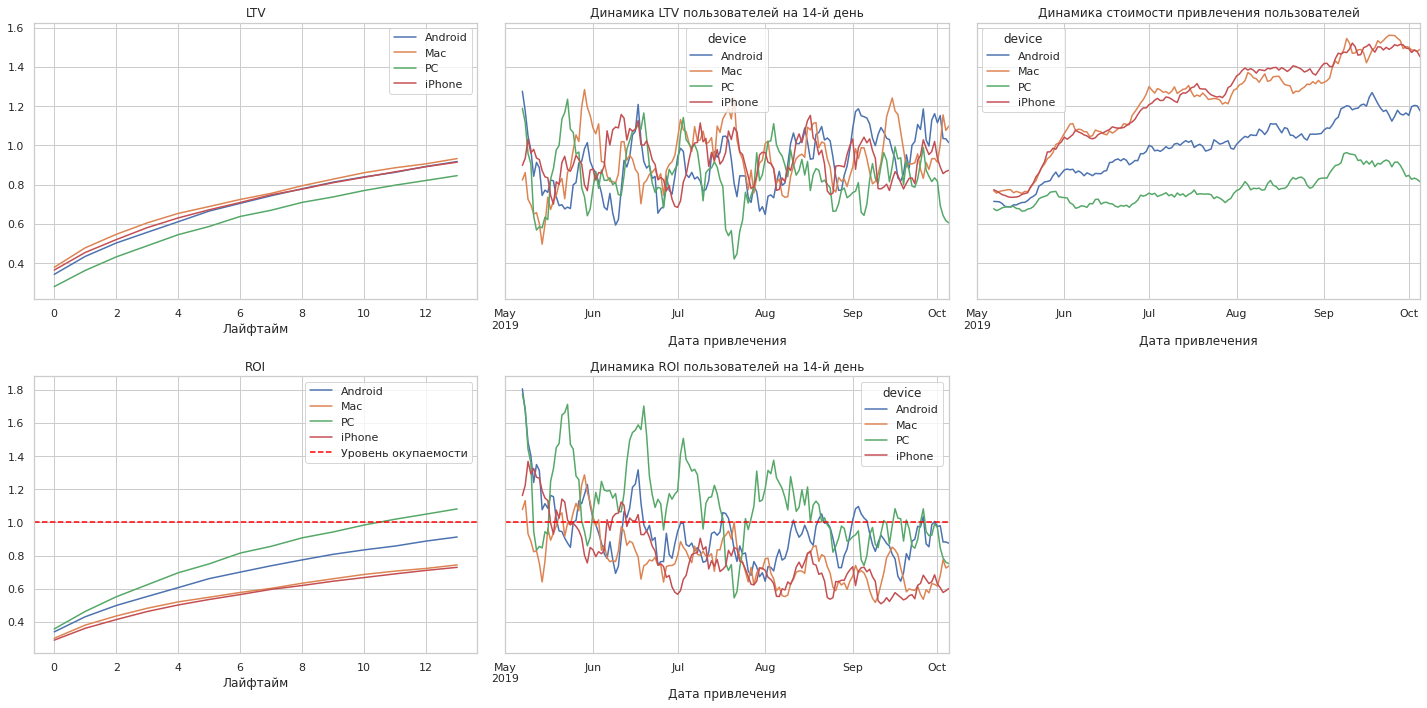

In [75]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

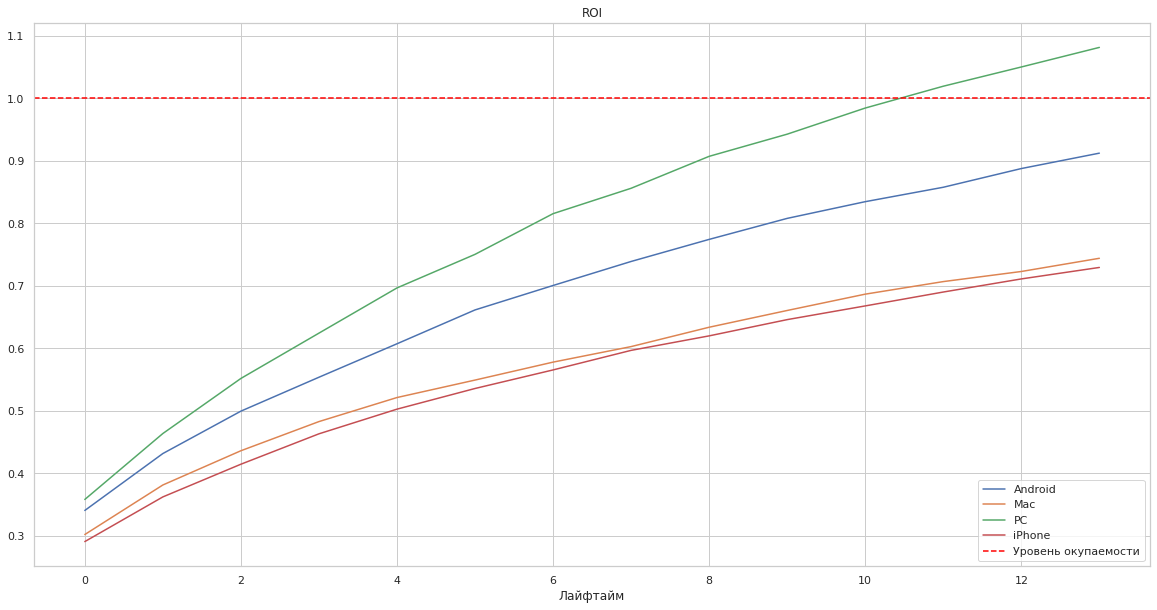

In [76]:
# ничего не разобрать, сделаем побольше)
window=7

roi = roi_grouped.drop(columns=['cohort_size', 'cac'])
roi.T.plot(grid=True, figsize=(20, 10))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI')
plt.show() 

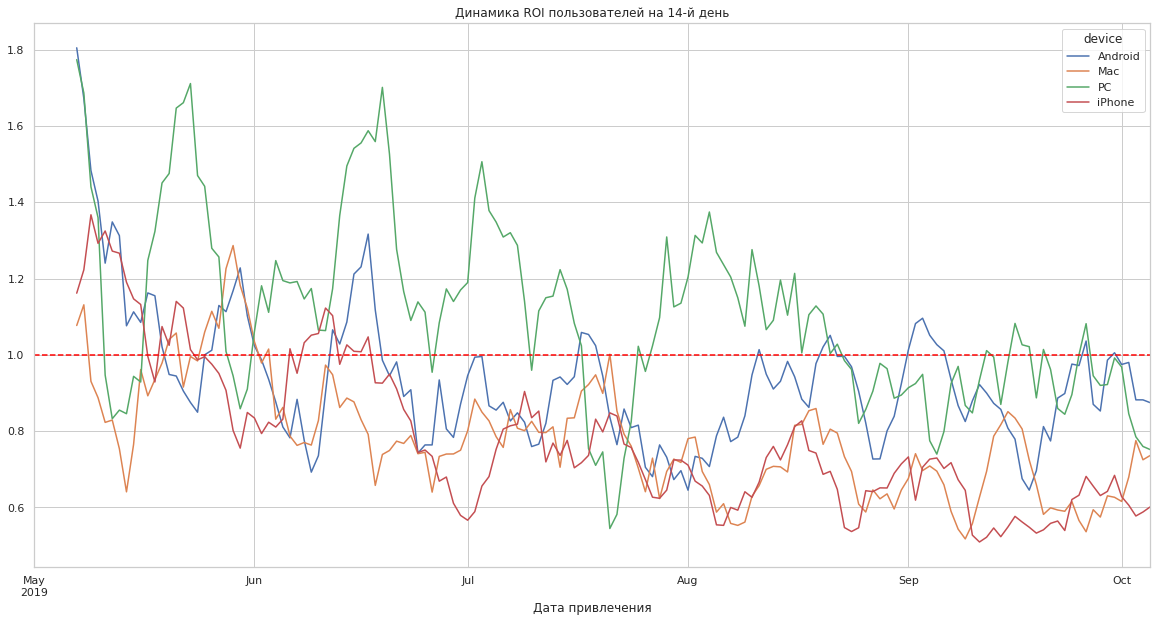

In [77]:
columns = [name for name in roi_history.index.names if name not in ['dt']]
filtered_data = roi_history.pivot_table(
    index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
filter_data(filtered_data, window).plot(grid=True, figsize=(20, 10))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))
plt.show() 

**Выводы**

- Окупаются только ПК клиенты. 
- Пользователи Андроида к концу второй недели находятся на уровне 90% РОИ, Айфон и Макбук чуть выше 70%.

- Рекламный бюджет в начале анализируемого периода был примерно одинаковый для всех устройств, но в дальнейшем начал более сильно расти именно на Маках и Айфонах
- На момент анализа все 4 сегмента устройств  не окупаются, при этом Айфоны и Макбуки стабильно перестали окупаться в июле, то ПК и Андроид держались дольше. 

<a id='53'></a>
### Окупаемость рекламы с разбивкой по странам

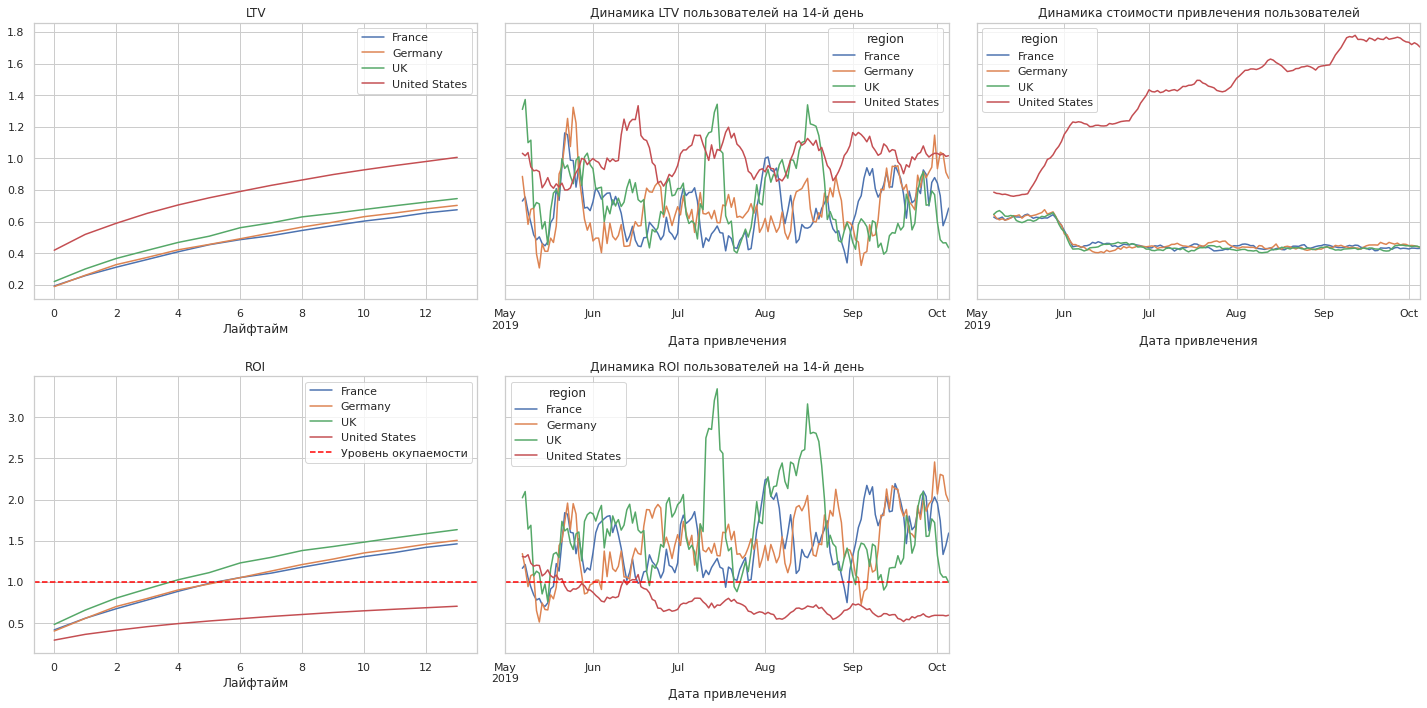

In [78]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы**

- Отсутствует окупаемость по пользователям из США на протяжении всех 14 дней. Другие страны окупаются через 3-4 дня.
- Также, на графике динамики ROI заметно ухудшение качество пользователей именно из США, остальные страны, с учетом сезонности, имеют стабильную динамику. 
- Также можно увазять ухудшение качества пользователей из США с новой рекламной компанией в этой стране, т.к. взрывной рост в рекламной компании прозошел только по США. До увеличения маркетинговых затрат на США ROI был на уровне других стран. 
- Затраты на привлечение пользователей из Европейских стран уменьшились. 

Выясним, какая соцсеть привела нам таких некачественных американцев. 

<a id='54'></a>
### Окупаемость рекламы с разбивкой по рекламным каналам

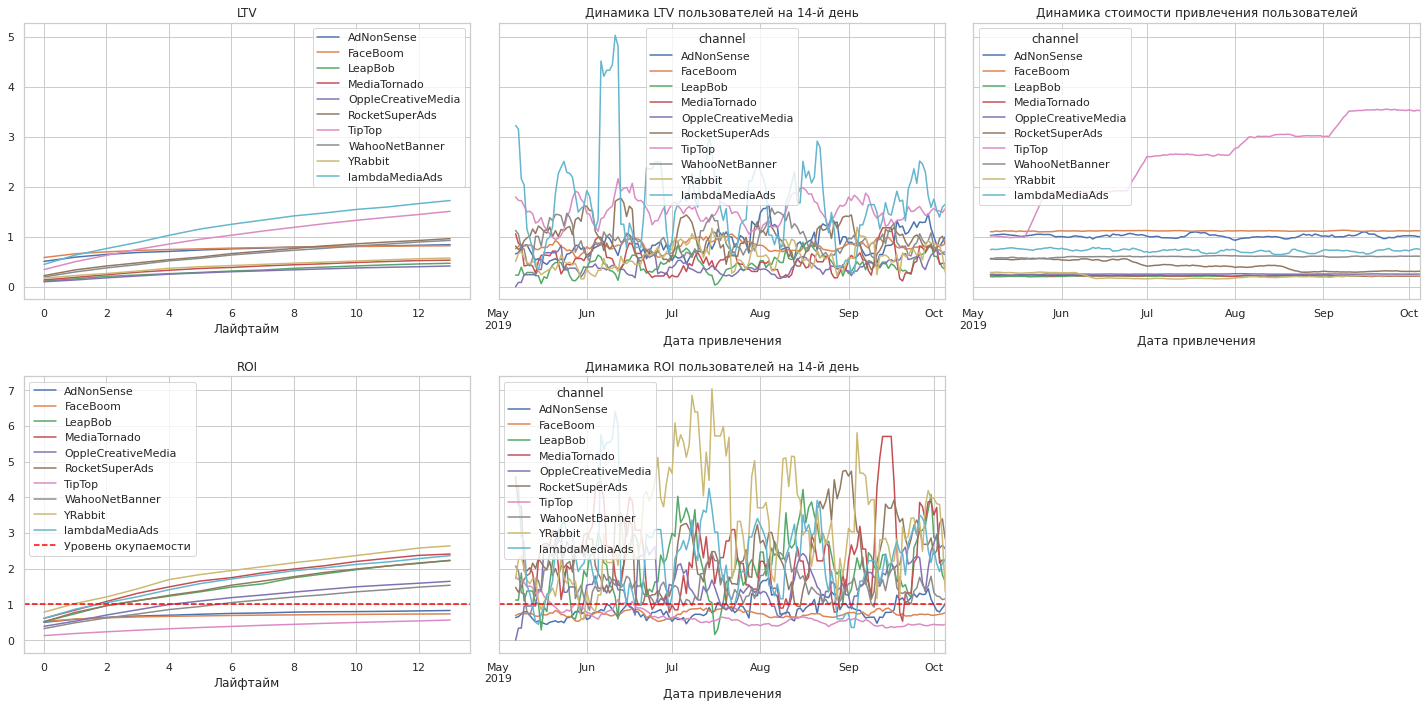

In [79]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

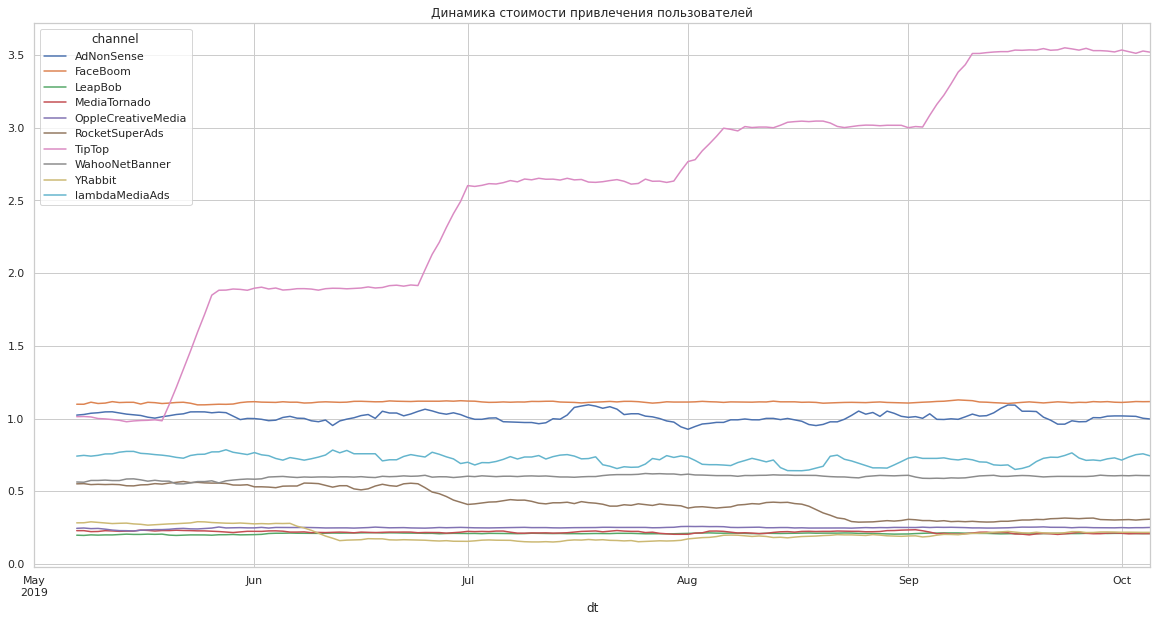

In [80]:
cac_history = roi_history[['cac']]

columns = [name for name in cac_history.index.names if name not in ['dt']]
filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
filter_data(filtered_data, window).plot(grid=True, figsize=(20, 10))
plt.title('Динамика стоимости привлечения пользователей')
plt.show() 

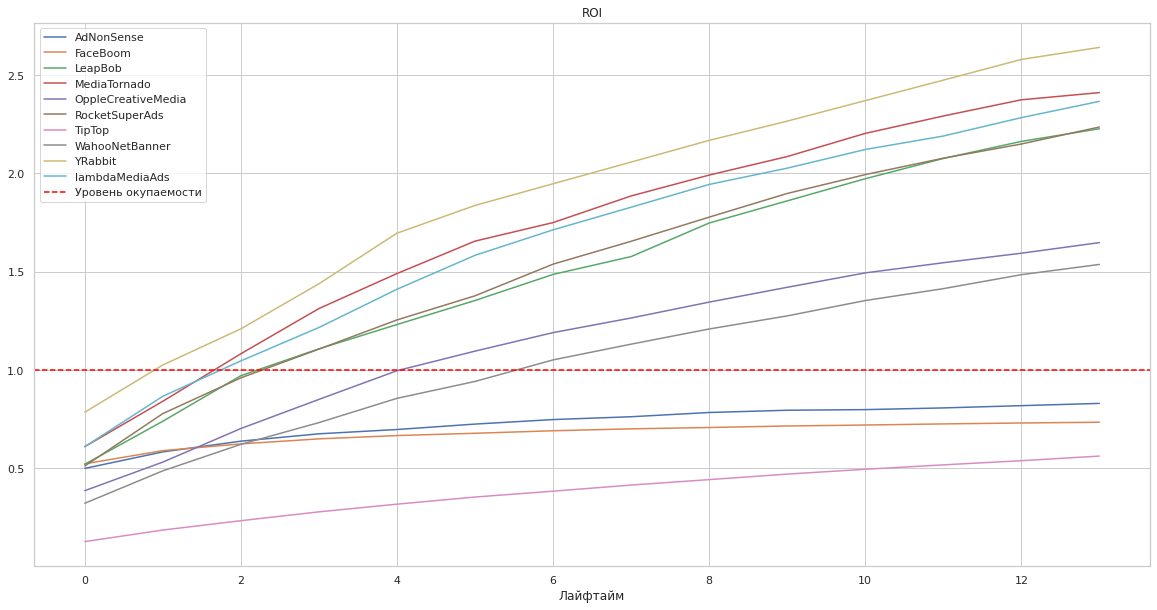

In [81]:
roi = roi_grouped.drop(columns=['cohort_size', 'cac'])
roi.T.plot(grid=True, figsize=(20, 10))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI')
plt.show() 

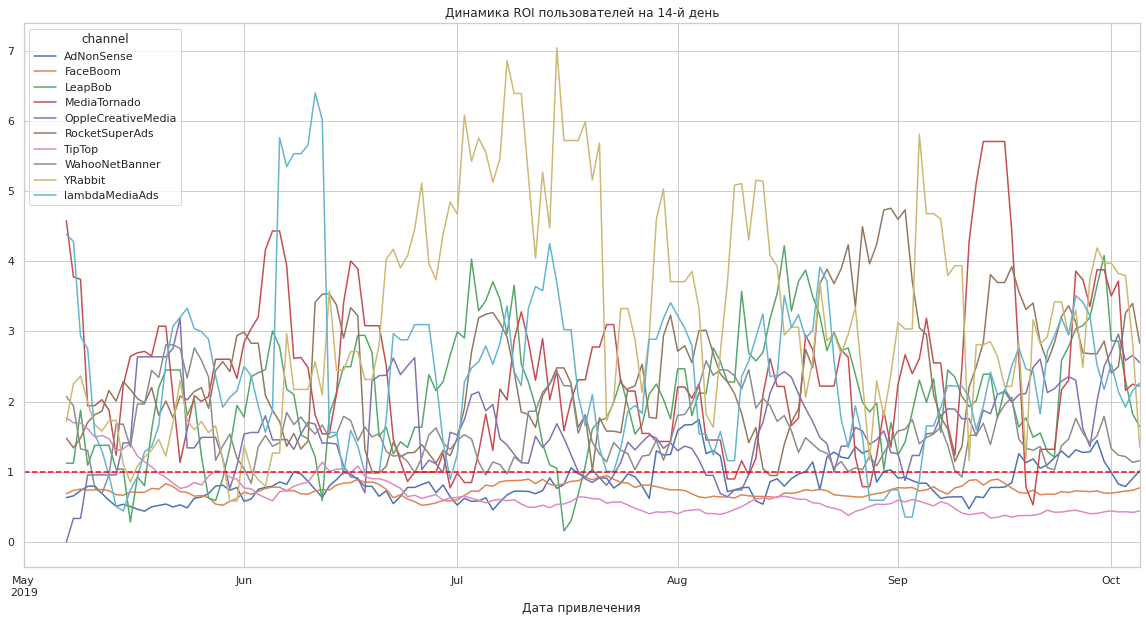

In [82]:
columns = [name for name in roi_history.index.names if name not in ['dt']]
filtered_data = roi_history.pivot_table(
    index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
filter_data(filtered_data, window).plot(grid=True, figsize=(20, 10))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))
plt.show() 

**Выводы**

- Увеличение рекламного бюджета прозошло только по 1 сети - TipTop;
- При этом, до увеличения бюджета - клиенты из ТипТопа были окупаемые. После - стабильно убыточные.
- Помимо ТипТопа выделяются также 2 другие стабильно убыточные соцсети - ФейсБум и Аднон. Стоит отметить, что пользователи из этих двух соцсетей также не очень активно покупают после своих первых покупок (уровень входя достаточно высок - 50% РОИ, потом растет незначительно). По другим соцсетям клиенты более стабильно покупают на всем 14-дневном промежутке. 

Подведем итог, убыточные клиенты для нашей компаниий:
- Из США
- Пришли из ТипТопа после начала крупных вложений в рекламу в этой соцсети, а также были стабильно убыточные в ФейсБуме и Адноне на всем протяжении анализа.
- Пользуются продукцией Apple. 

<a id='55'></a>
### Конверсия и удержание с разбивкой по устройствам

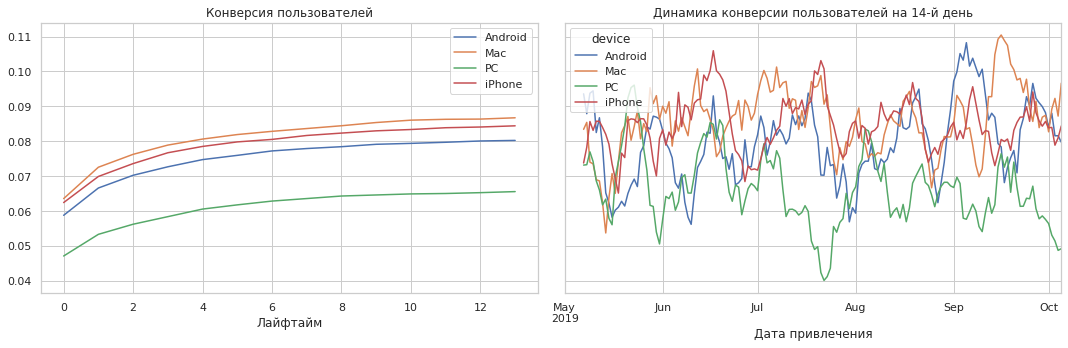

In [83]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

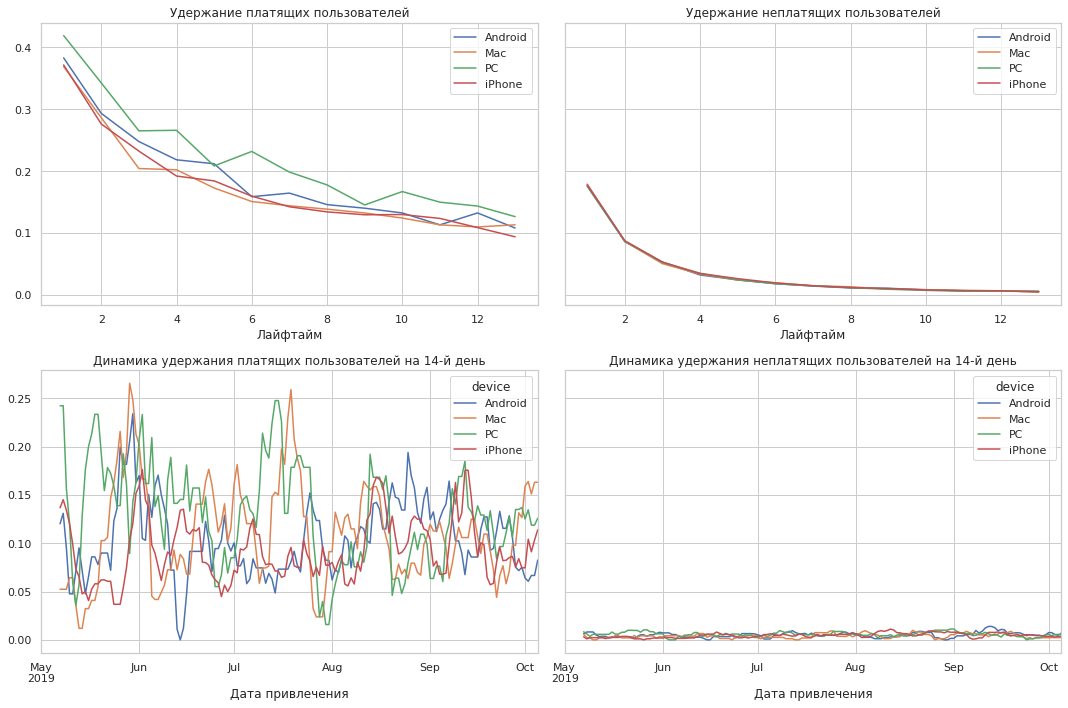

In [84]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

- Выделяется более слабая конверсия пользователей ПК;
- Удержание пользователей, с учетом сезонности, на плюс-минус стабильном уровне;
- По неплатящим пользователям изменения отсутствуют.

<a id='56'></a>
### Конверсия и удержание с разбивкой по странам

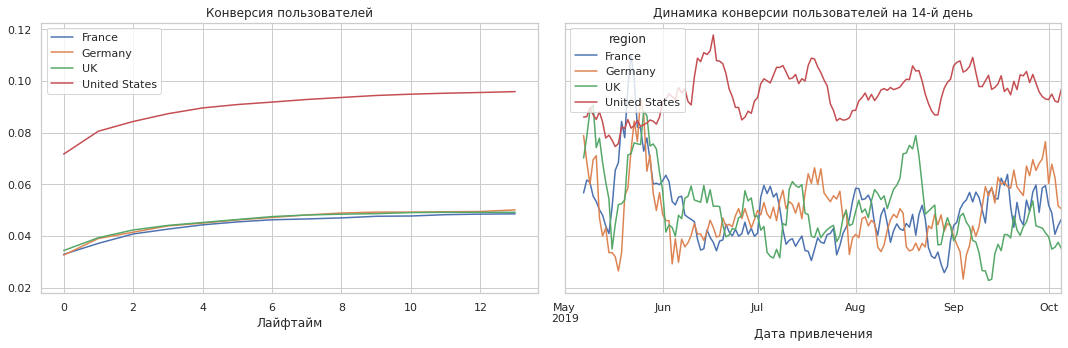

In [85]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

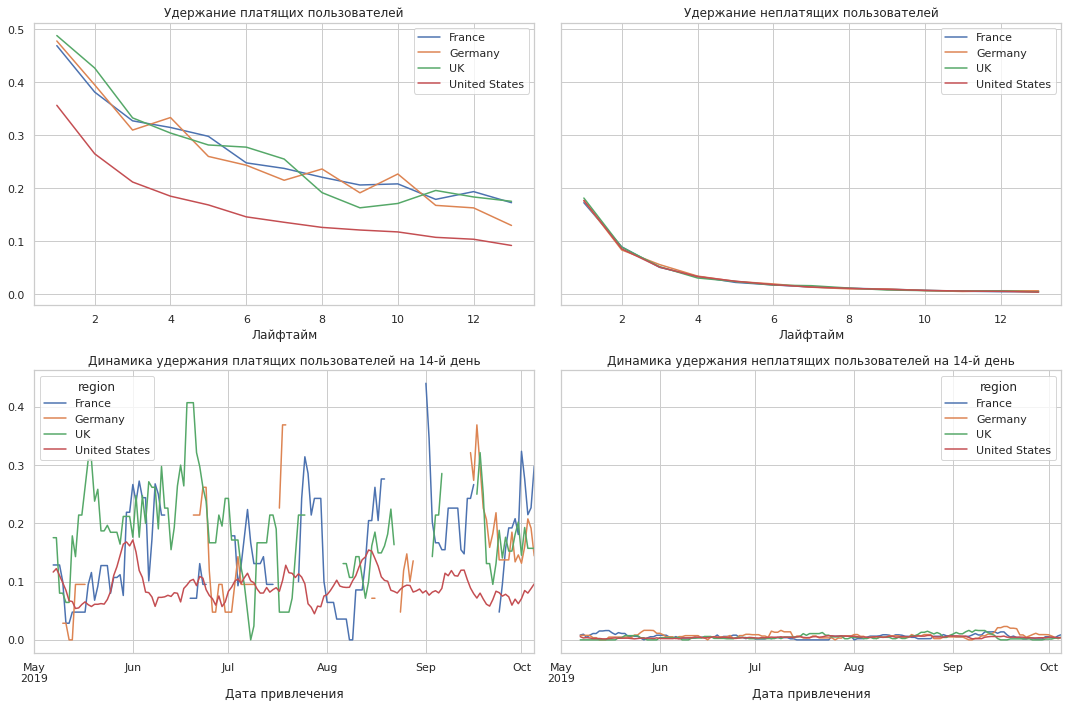

In [86]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

- Пользователи из США имеют конверсию чуть выше остальных стран (на 3пп), при этом динамика конверсии, после новой рекламной компании также увеличилась.
- Однако удержание по США хуже остальных стран, при этом динамика удержания на 14 день никак не отреагировала на новую рекламную компанию.

<a id='57'></a>
### Конверсия и удержание с разбивкой по рекламным каналам

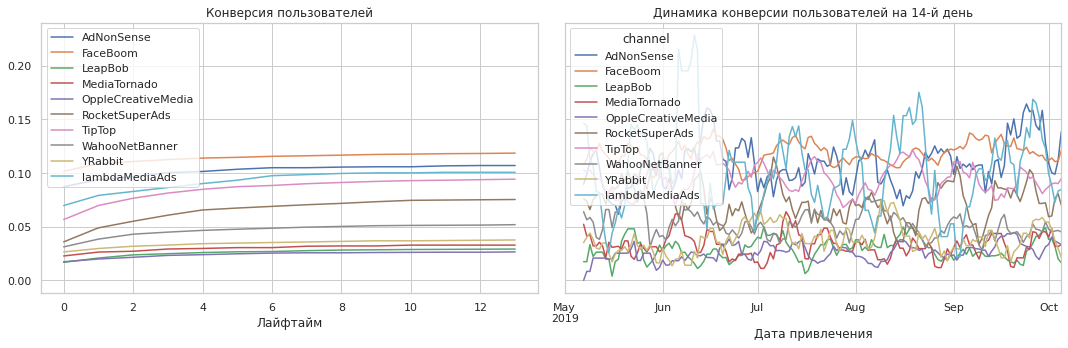

In [87]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

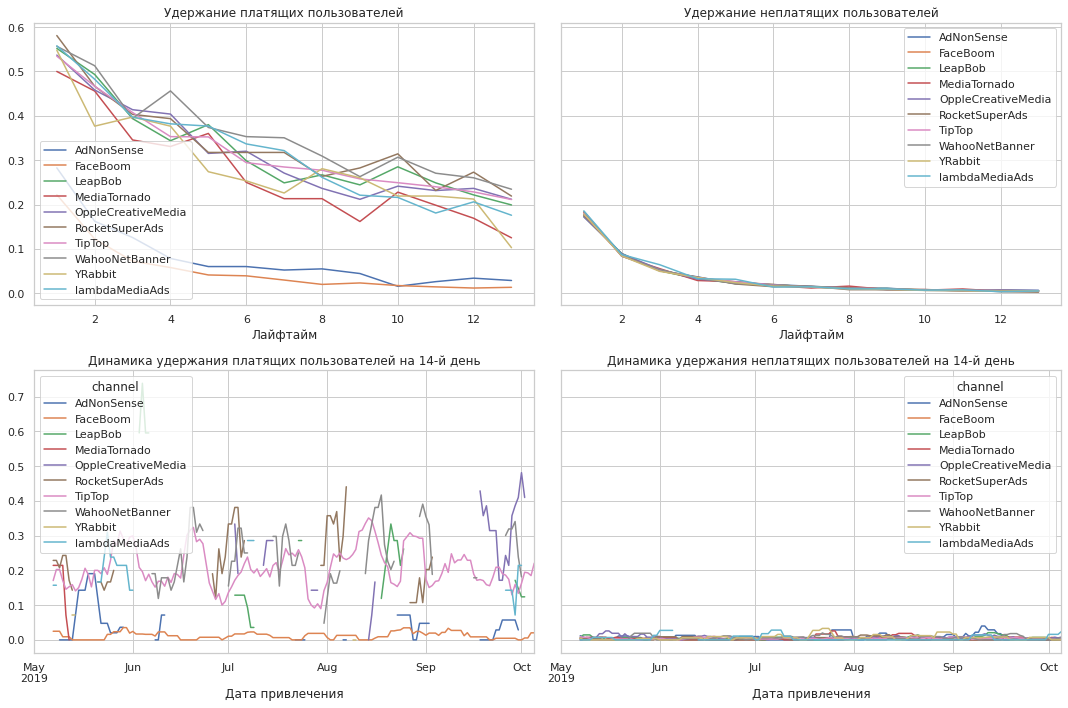

In [88]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

- Удержание по Фейсбуму - самое худшее среди всех каналов (даже хуже органических пользователей);
- Удержание ТипТопа на уровне других каналов. 

**Промежуточные выводы**

**Общая окупаемость**
- LTV достаточно стабильный, при этом имеются сезонные факторы и незначительное ухудшение качества пользователей;
- Реклама не окупается, к концу второй недели ROI чуть выше 80%;
- Клиенты перестали окупаться после июня месяца. При этом, с учетом взрывного роста вложений в маркетинг в конце мая, был краткосрочный рост динамики ROI в первой половине июня. Затем стабильный спад и пересечение точки окупаемости во второй половине июня. 
- имеет место стабильное увеличение стоимости привлечения пользователей, рекламный бюджет увеличивается.

**Окупаемость по устройствам**
- Окупаются только ПК клиенты. 
- Пользователи Андроида к концу второй недели находятся на уровне 90% РОИ, Айфон и Макбук чуть выше 70%.
- Рекламный бюджет в начале анализируемого периода был примерно одинаковый для всех устройств, но в дальнейшем начал более сильно расти именно на Маках и Айфонах
- На момент анализа все 4 сегмента устройств не окупаются, при этом Айфоны и Макбуки стабильно перестали окупаться в июле, то ПК и Андроид держались дольше. 

**Конверсия и удержание по устройствам**
- Выделяется более слабая конверсия пользователей ПК;
- Удержание пользователей, с учетом сезонности, на плюс-минус стабильном уровне;
- По неплатящим пользователям изменения отсутствуют.

**Окупаемость по странам**
- Отсутствует окупаемость по пользователям из США на протяжении всех 14 дней. Другие страны окупаются через 3-4 дня.
- Также, на графике динамики ROI заметно ухудшение качество пользователей именно из США, остальные страны, с учетом сезонности, имеют стабильную динамику. 
- Также можно увазять ухудшение качества пользователей из США с новой рекламной компанией в этой стране, т.к. взрывной рост в рекламной компании прозошел только по США. До увеличения маркетинговых затрат на США ROI был на уровне других стран. 
- Затраты на привлечение пользователей из Европейских стран уменьшились. 


**Конверсия и удержание по странам**
- Пользователи из США имеют конверсию чуть выше остальных стран (на 3пп), при этом динамика конверсии, после новой рекламной компании также увеличилась.
- Однако удержание по США хуже остальных стран, при этом динамика удержания на 14 день никак не отреагировала на новую рекламную компанию.


**Окупаемость по каналам**
- Увеличение рекламного бюджета прозошло только по 1 сети - TipTop;
- При этом, до увеличения бюджета - клиенты из ТипТопа были окупаемые. После - стабильно убыточные.
- Помимо ТипТопа выделяются также 2 другие стабильно убыточные соцсети - ФейсБум и Аднон. Стоит отметить, что пользователи из этих двух соцсетей также не очень активно покупают после своих первых покупок (уровень входя достаточно высок - 50% РОИ, потом растет незначительно). По другим соцсетям клиенты более стабильно покупают на всем 14-дневном промежутке. 

**Конверсия и удержание по каналам**
- Удержание по Фейсбуму - самое худшее среди всех каналов (даже хуже органических пользователей);
- Удержание ТипТопа на уровне других каналов. 

<a id='6'></a>
## Общие выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**Выявлено:**
- Клиенты не окупаются за 14 дневный срок;
- ROI пользователей на май был на уровне 1.4, к октябрю 0.7;
- Снижение ROI ниже 1.0 в второй половине июля;
- Рост затрат на маркетинговые компании и стоимости привлечения пользователей более чем в 3 раза (основной рост в мае-июне).

**Источники ухудшения окупаемости:**
- По устройствам выявлен ROI ниже 1 к дате анализа, при этом основные драйверы – Айфон и Макбук, т.к. динамика стоимости привлечения пользователей по ним наибольшая и динамика ROI ниже 1 после 2 половины июня. ПК и Андроид пользователи находятся около точки окупаемости, а также их совокупный ROI все еще выше 1 на всем промежутке анализа.
- По регионам выявлен негатив по пользователям из США. Только по пользователям из США произошло увеличение стоимости привлечения пользователей, а также имеется совокупный ROI ниже 1. По динамике пользователи из США не окупаются также с середины июня. Пользователи из других регионов имеют ROI выше 1.
- По рекламным каналам рост маркетингового бюджета произошел за счет увеличения вложений в рекламу в TipTop. По ROI такие каналы как TIpTop, FaceBoom и AdNon не окупаются. Также кривая ROI этих каналов растет более медленными темпами, в сравнении с другими каналами. Точка входа ROI по TipTopу наиболее низкая (в 1.5-2 раза ниже ближайшего конкурента). 

**Рекомендации:**

По каналам:
- Отказаться от рекламы в FaceBoom и AdNon ввиду их низкой эффективности и отсутствие окупаемости клиентов из этих каналов. 
- Рассмотреть возможно рекламы в топовых каналах: YRabbit, Media Tornado, Lambda.
- Проанализировать рекламу в TipTop. Показатели по ROI и CAC просто ужасающие и как будто бы подсказывают отказаться от данной рекламы, однако конверсия и удержание клиентов из этого канала на хорошем уровне. Возможно следует переадаптировать рекламную компанию под пользователей данного канала. 

По странам:
- Проанализировать причину отсутствия окупаемости по США. Возможно, сайт более ориентирован на европейских пользователей, с учетом контента. Провести анализ возможности адаптации контента под Североамериканских пользователей, либо увеличить вложения в рекламу в Европе. 

По девайсам:
- Имеется негатив по пользователям Apple продукции, возможно приложение/сайт хуже адаптирован под MacOs или IOS. Провести технический анализ. 

**Наиболее перспективная страна** – Великобритания (высокий ROI и LTV)

**Наиболее перспективные каналы** – lambda (высокая конверсия , ROI и LTV) и LeapBob (высокий ROI, но низкий LTV, видимо очень дешевая реклама и бюджетные клиенты)